In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import signal
from scipy.signal import butter
from scipy.signal import filtfilt
import matplotlib.pyplot as plt
import h5py

In [3]:
from utils import *

### First decimate the files down to 100 Hz, and convert to strain values

In [4]:
# 06/02/23 data
# filepath = r'D:\das-data-oklahoma\recording_2023-06-06T09_44_56-0500'
# decim_to_100(filepath,'sensor_2023-06-06T095457-0500')

In [51]:
directory = r'D:\das-data-oklahoma\recording_2023-06-06T11_16_40-0500\sensor_2023-06-06T115659-0500'

In [52]:
test = h5py.File(directory +'.h5', 'r')

In [53]:
list(test.keys())


['Acquisition']

In [54]:
data = test['/Acquisition/Raw[0]/RawData']


In [187]:
# list(data.keys())
# data2 = data['Custom', 'Raw[0]']

AttributeError: 'Dataset' object has no attribute 'keys'

In [55]:
strain_data = np.double(data)

Load in data

In [167]:
# directory = r'D:\das-data-oklahoma\recording_2023-06-06T09_44_56-0500\sensor_2023-06-06T095457-0500_decimated100hz'
# strain_data = load_decim_data(directory)

In [56]:
print(np.shape(strain_data))

(3000000, 102)


In [11]:
# strain_data = strain_data.T

In [57]:
nt, nch = np.shape(strain_data)

In [114]:
strain_data = strain_data.T

In [60]:
strain_data_test[:,:]

array([[-5.30832085e+08,  1.75701375e+09, -9.35371954e+08, ...,
         7.19213970e+08, -1.32772554e+09, -2.08712669e+09],
       [-5.30829818e+08,  1.75701933e+09, -9.35370896e+08, ...,
         7.19195859e+08, -1.32771799e+09, -2.08711316e+09],
       [-5.30828955e+08,  1.75701329e+09, -9.35369562e+08, ...,
         7.19179698e+08, -1.32771231e+09, -2.08709219e+09],
       ...,
       [-1.84155406e+09, -1.93937452e+09,  1.88078117e+09, ...,
         1.38096983e+09,  1.41467536e+09,  1.17973816e+09],
       [-1.84155245e+09, -1.93937745e+09,  1.88078194e+09, ...,
         1.38096480e+09,  1.41468732e+09,  1.17974773e+09],
       [-1.84155150e+09, -1.93937761e+09,  1.88078356e+09, ...,
         1.38095957e+09,  1.41469144e+09,  1.17974887e+09]])

In [61]:
print(nt)

3000000


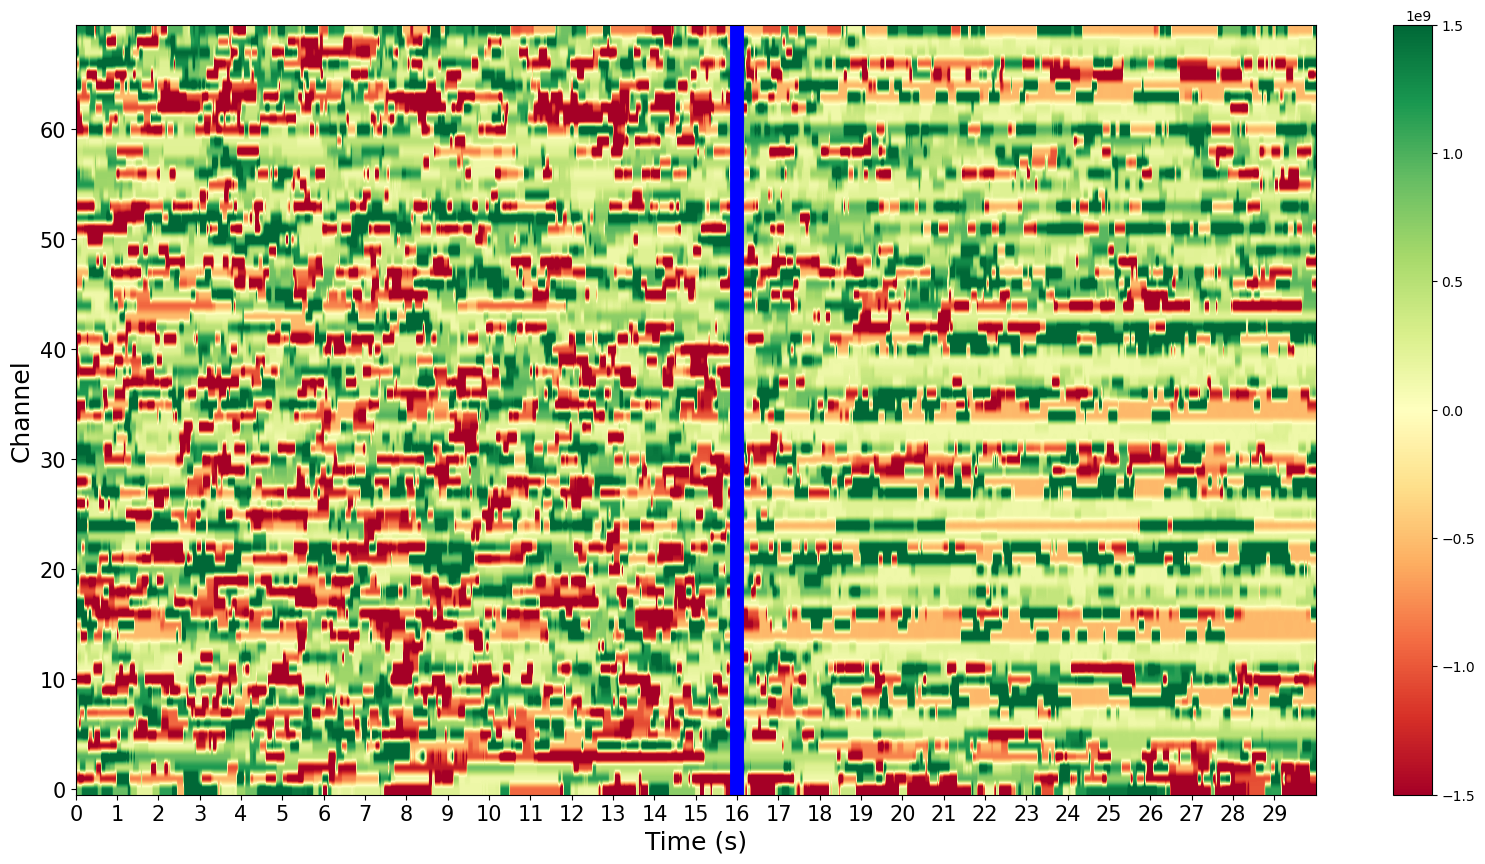

In [117]:
cmap = plt.get_cmap('RdYlGn')  # Red-Yellow-Green colormap

# Create the figure
fig, ax = plt.subplots(figsize=(20,10))

# Create a pseudo-color plot with the time series data
cax = ax.imshow(strain_data[:70,800000:950000], aspect='auto', cmap=cmap, origin='lower',vmin=-1.5*(10**9),vmax=1.5*(10**9))

# Add a colorbar
fig.colorbar(cax)

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Channel')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(axis='both', which='major', labelsize=15)

# Set the x-ticks to represent time
ax.set_xticks(np.arange(0, 950000-800000, 5000))
ax.set_xticklabels(np.arange(0, 30, 1))  # Labels go from 0 to 30 seconds
ax.axvline(x=80000, linewidth=10,color='blue')

# Show the plot
plt.show()

In [119]:
def plot_spectrogram(time_series_data, spatial_point):
    frequencies, times, Sxx = signal.spectrogram(time_series_data, fs=100) 

    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(f'Spectrogram for Spatial Point: {spatial_point}')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

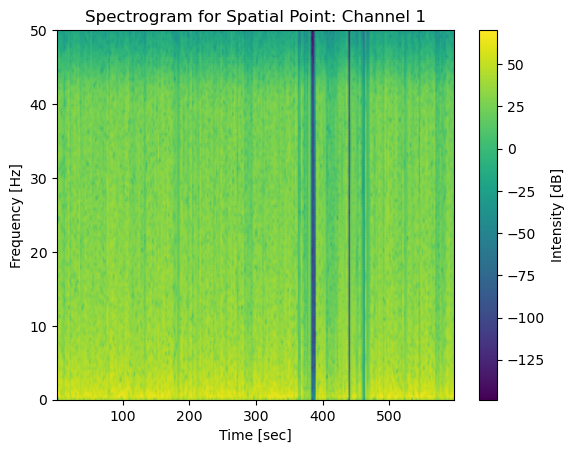

In [123]:
plot_spectrogram(strain_data[:600000,4],'Channel 1')

In [ ]:
# Each channel is approximately 8 CSUs, 1 CSU is approximately 1.027 meters
# We have 102 channel readouts

### Try to figure out which channels correspond with what!
#### Indexes: 
Estimate, from shed to beginning of first longitudinal cable: 10 meters ~ 1.5 channels<br />

### Look at the channels with highest strain first (Probably at the bottom of the tower)
#### Indexes:


In [124]:
from utils import filter_plot_single

In [90]:
phase_1 = filter_plot_single(strain_data)
# phase_2 = filter_plot_single(strain_data_P2)
# phase_3 = filter_plot_single(strain_data_P3)
# phase_4 = filter_plot_single(strain_data_P4)

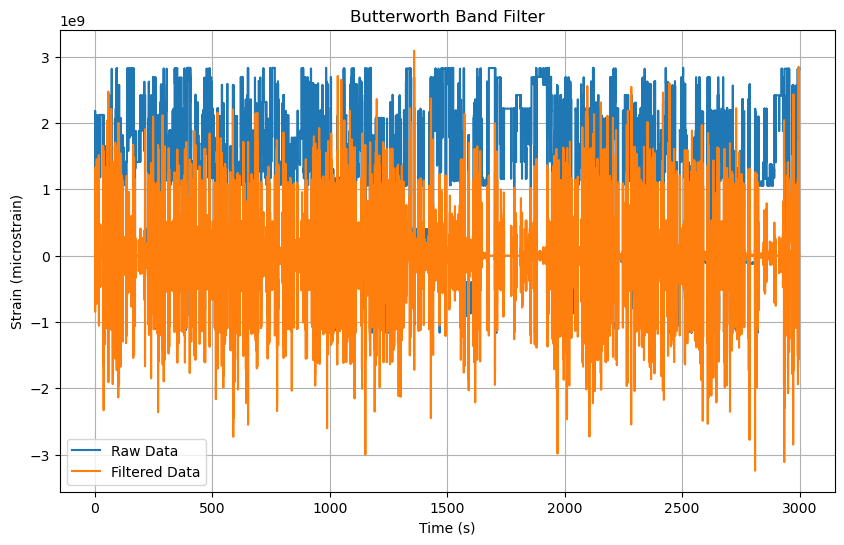

In [104]:
channel = 2
phase_1.butterworth(channel,order=2,cutoff_freq= 0.1)
phase_1.plot_side_by_side()
# phase_2.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_2.plot_side_by_side()
# phase_3.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_3.plot_side_by_side()
# phase_4.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_4.plot_side_by_side()

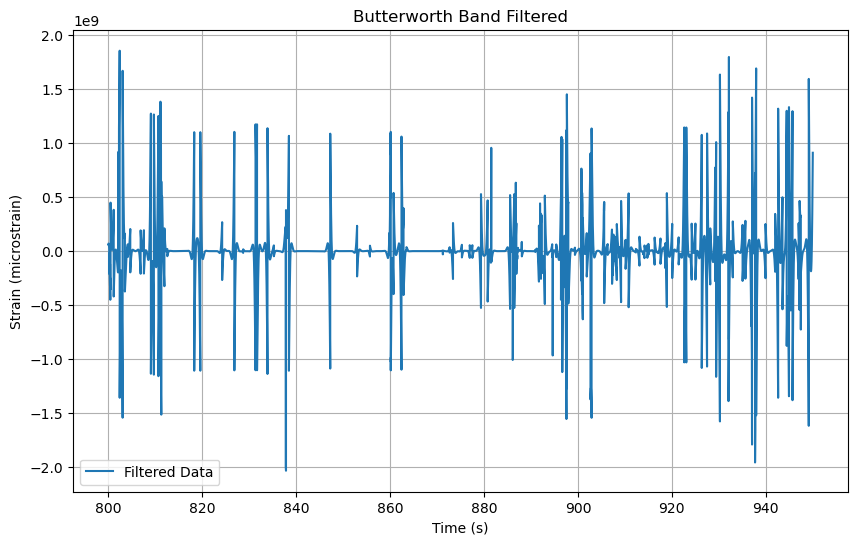

In [108]:
phase_1.plot_filtered(time_start=800000,time_end=950000)
# phase_2.psd_freqs()
# phase_3.psd_freqs()
# phase_4.psd_freqs()

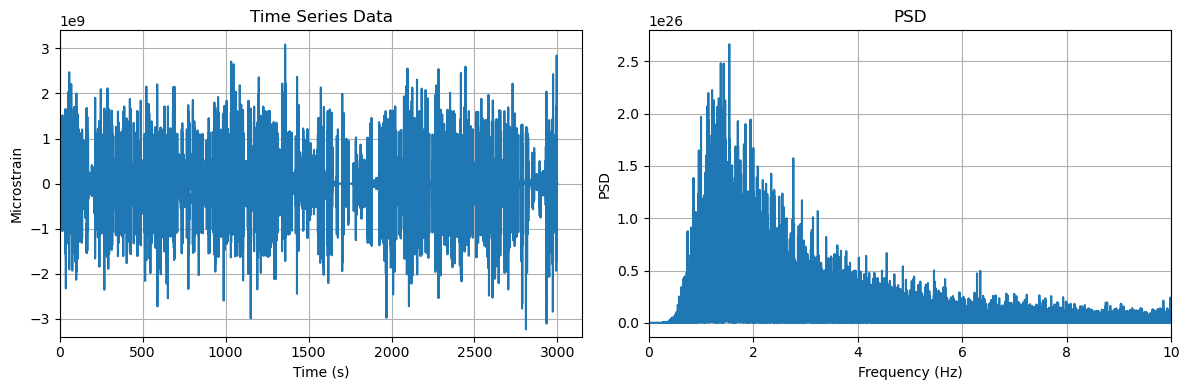

In [106]:
phase_1.plot_psd_filtered(10)
# phase_2.plot_psd_filtered(5)
# phase_3.plot_psd_filtered(5)
# phase_4.plot_psd_filtered(5)

In [109]:
# Listing the relevant channels
# channels = [6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,30,31,32,33,34,35,36,37,38,39] 

channels = range(13,16)
print(channels)
# recall that each channel is 1 csu ~ 8m
# channels = [54,53,52,51,50,49,48,46,45,44,43,39,38,37]
# channels = [12,13,14,15,16,17,19,20,21,22,26,27,54,53,52,51,50,49,48,46,45,44,43,39,38,37,59,60,61,62,63,64,66,67,68,69,74,75,76,104,103,102,101,100,99,97,96,95,94,90,89]

range(13, 16)


In [110]:
phase_1.butter_all(channels=channels,cutoff_freq=0.1,freq=5000)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

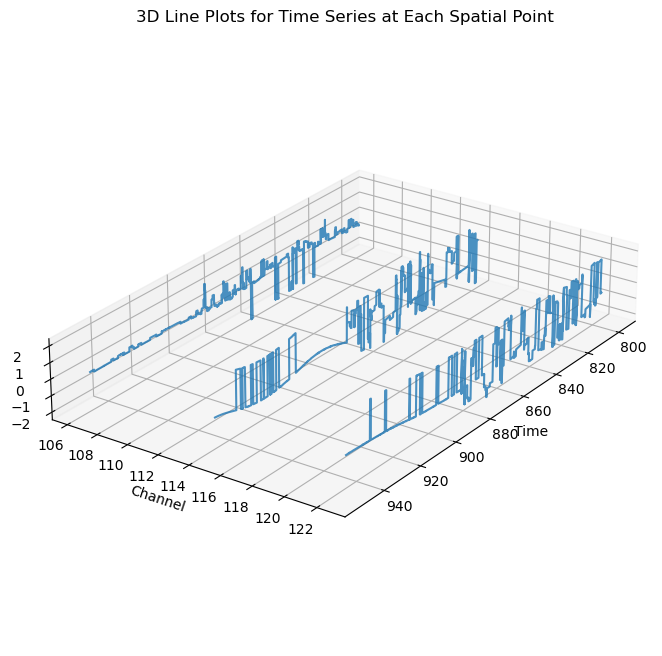

In [111]:
time_start = 0
phase_1.iso_view_plot(channels=channels,time_start=800000,time_end=950000)

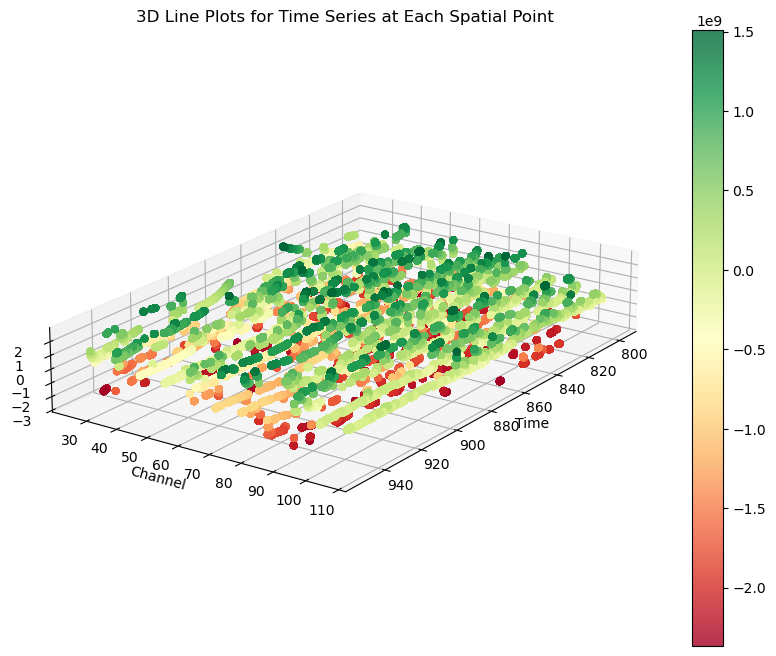

In [103]:

phase_1.iso_view_scatter(channels=channels,time_start=800000,time_end=950000)


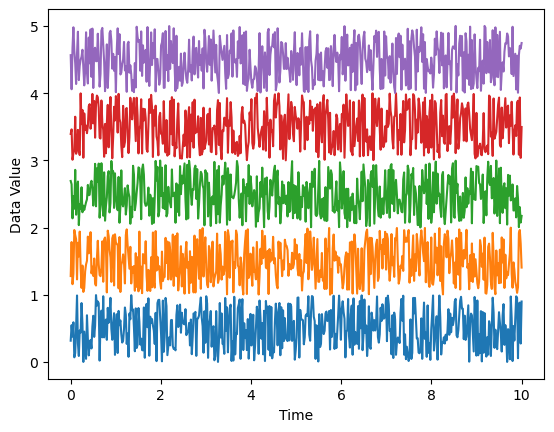

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Let's generate some example data
# Assume data_all is a 2D array where each row represents a spatial point and each column is a time point
num_spatial_points = 5
num_time_points = 500
data_all = np.random.rand(num_spatial_points, num_time_points)

# Generate time points
time = np.linspace(0, 10, num_time_points)

# Create the figure
fig, ax = plt.subplots()

# Plot each spatial point's time series
offset = 1  # Change this to adjust the gap between lines
for i in range(num_spatial_points):
    time_series = data_all[i, :]
    ax.plot(time, time_series + i*offset)

# Set labels
ax.set_xlabel('Time')
ax.set_ylabel('Data Value')

# Show the plot
plt.show()


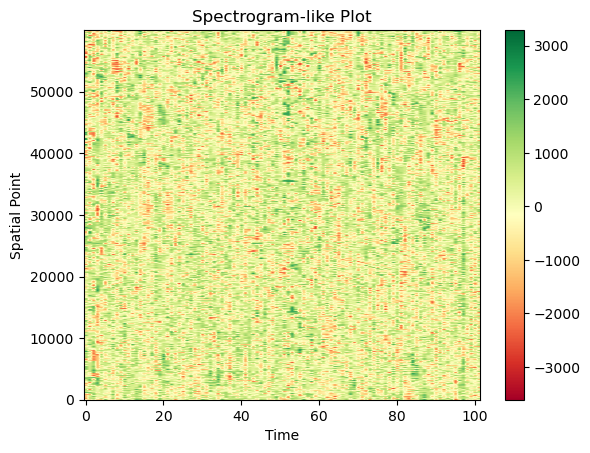

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Let's generate some example data
# Assume data_all is a 2D array where each row represents a spatial point and each column is a time point
num_spatial_points = 5
num_time_points = 500
data_all = np.random.rand(num_spatial_points, num_time_points)

# Generate time points

# Create a colormap
cmap = plt.get_cmap('RdYlGn')  # Red-Yellow-Green colormap

# Create the figure
fig, ax = plt.subplots()

# Create a pseudo-color plot with the time series data
cax = ax.imshow(strain_data, aspect='auto', cmap=cmap, origin='lower')

# Add a colorbar
fig.colorbar(cax)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Spatial Point')
ax.set_title('Spectrogram-like Plot')

# Set the x-ticks to represent time
# ax.set_xticks(np.linspace(0, num_time_points-1, 6))
# ax.set_xticklabels(np.linspace(time.min(), time.max(), 6))

# Show the plot
plt.show()
